# Building Neural Network

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
dp = os.environ.get('pub_data')
ms_data = dp + 'MNIST/'

In [57]:
data = pd.read_csv(ms_data + 'MNIST_train.csv')

In [58]:
data.head(10)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [60]:
Y_train

array([0, 4, 4, ..., 3, 2, 9])

In [61]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [62]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [63]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 9 9 ... 9 6 6] [0 4 4 ... 3 2 9]
0.10067967253682265
Iteration:  10
[0 9 9 ... 9 2 0] [0 4 4 ... 3 2 9]
0.17730808996762656
Iteration:  20
[0 9 9 ... 9 2 0] [0 4 4 ... 3 2 9]
0.2518347768606248
Iteration:  30
[0 9 9 ... 9 3 0] [0 4 4 ... 3 2 9]
0.31683587857421314
Iteration:  40
[0 9 4 ... 2 3 0] [0 4 4 ... 3 2 9]
0.3940914252783945
Iteration:  50
[0 9 4 ... 2 3 0] [0 4 4 ... 3 2 9]
0.4660926456380617
Iteration:  60
[0 9 4 ... 2 3 0] [0 4 4 ... 3 2 9]
0.511601891557484
Iteration:  70
[0 4 4 ... 2 3 9] [0 4 4 ... 3 2 9]
0.5464838387091306
Iteration:  80
[0 4 4 ... 3 3 9] [0 4 4 ... 3 2 9]
0.576094510076442
Iteration:  90
[0 4 4 ... 3 3 9] [0 4 4 ... 3 2 9]
0.6044678723368193
Iteration:  100
[0 4 4 ... 3 3 9] [0 4 4 ... 3 2 9]
0.6320107120459669
Iteration:  110
[0 4 4 ... 3 3 9] [0 4 4 ... 3 2 9]
0.6536381972575807
Iteration:  120
[0 4 4 ... 3 3 9] [0 4 4 ... 3 2 9]
0.6719944405837387
Iteration:  130
[0 4 4 ... 3 2 9] [0 4 4 ... 3 2 9]
0.6876726724181765
Iteration:  140


In [64]:
 def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


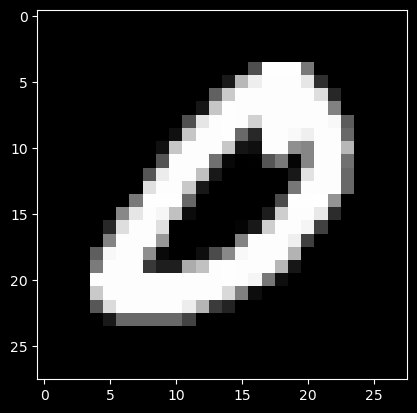

Prediction:  [4]
Label:  4


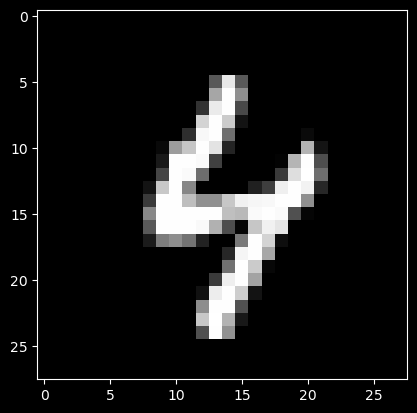

Prediction:  [4]
Label:  4


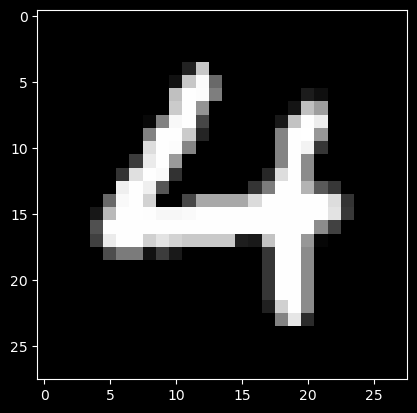

Prediction:  [0]
Label:  6


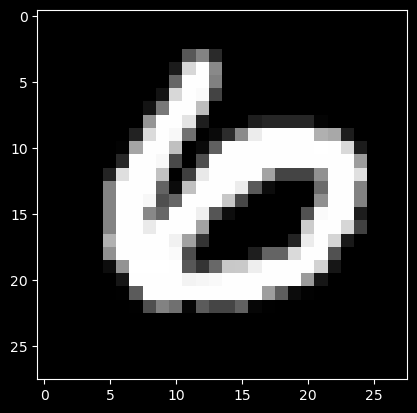

In [65]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [66]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 4 8 1 0 1 5 0 8 0 0 0 4 7 0 6 0 0 2 8 5 8 1 3 3 8 9 6 6 6 4 0 3 5 6 7 5
 7 1 6 4 3 3 9 2 4 3 7 4 6 0 9 4 1 7 4 9 8 7 6 4 8 2 0 8 5 1 3 9 0 1 2 7 6
 1 2 0 2 1 2 5 0 3 7 6 0 0 7 8 0 9 3 1 8 1 3 9 0 1 8 1 8 3 1 5 0 3 5 6 0 6
 8 5 2 7 6 1 7 6 8 5 5 1 1 1 0 7 1 0 8 0 6 1 7 9 3 3 9 1 7 6 1 1 0 8 0 9 5
 8 2 0 3 4 8 3 8 5 3 3 4 3 1 1 7 9 4 2 6 4 5 9 3 2 5 5 6 3 7 8 7 7 7 3 8 7
 0 1 9 9 5 0 3 1 6 5 8 9 8 9 9 9 0 2 2 8 9 4 6 0 8 6 2 3 4 2 4 8 4 5 5 0 1
 8 6 2 4 5 0 3 0 1 2 7 0 0 1 0 4 8 8 8 9 9 9 5 9 6 2 1 0 7 3 7 5 1 7 9 0 6
 8 8 6 2 9 8 2 5 7 8 7 8 0 7 4 1 8 8 4 9 3 3 1 8 8 9 5 9 8 1 1 0 0 1 3 2 9
 6 8 8 1 9 2 3 1 9 6 9 2 6 9 9 5 4 1 9 1 2 5 4 0 8 2 1 2 6 9 9 5 3 1 7 8 6
 1 7 9 9 8 9 3 8 6 4 1 6 9 5 2 1 1 9 1 5 8 9 9 4 6 9 0 4 7 0 1 4 5 3 5 4 2
 0 8 9 4 2 0 9 7 0 0 0 7 6 0 2 4 5 2 0 6 0 8 1 6 7 2 2 7 5 4 1 9 5 2 3 8 5
 8 6 4 9 6 3 6 1 2 3 6 7 1 1 6 6 0 4 9 9 5 6 9 5 8 9 9 9 8 0 7 4 0 4 9 1 5
 4 6 5 5 5 4 3 6 4 6 1 7 7 4 7 3 1 4 1 6 2 5 9 0 7 6 3 4 6 4 2 0 2 7 6 3 8
 1 5 9 5 5 3 3 1 2 5 3 8 

0.814